# TASK-2: PREDICTION USING UNSUPERVISED ML
## BY AYUSHI CHAUHAN

## 1. Import required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

#load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.head()) #See the first 5 rows

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## 2. Determining the optimum number of clusters using the elbow method


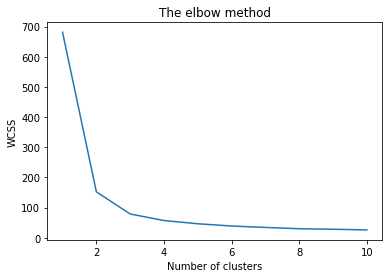

In [7]:
# Finding the optimum no 0f clusters for k-means classification

x = iris_df.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the result onto a line graph,
#  allowing us to observe 'The elbow'
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# OPTIMUM NUMBER OF CLUSTERS IS 3

## 3.  Creating the KMeans Classifier 

In [10]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


## 4. Plotting the clusters


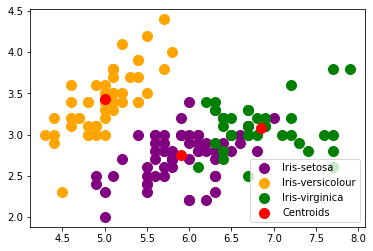

In [14]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'red', label = 'Centroids')

plt.legend()



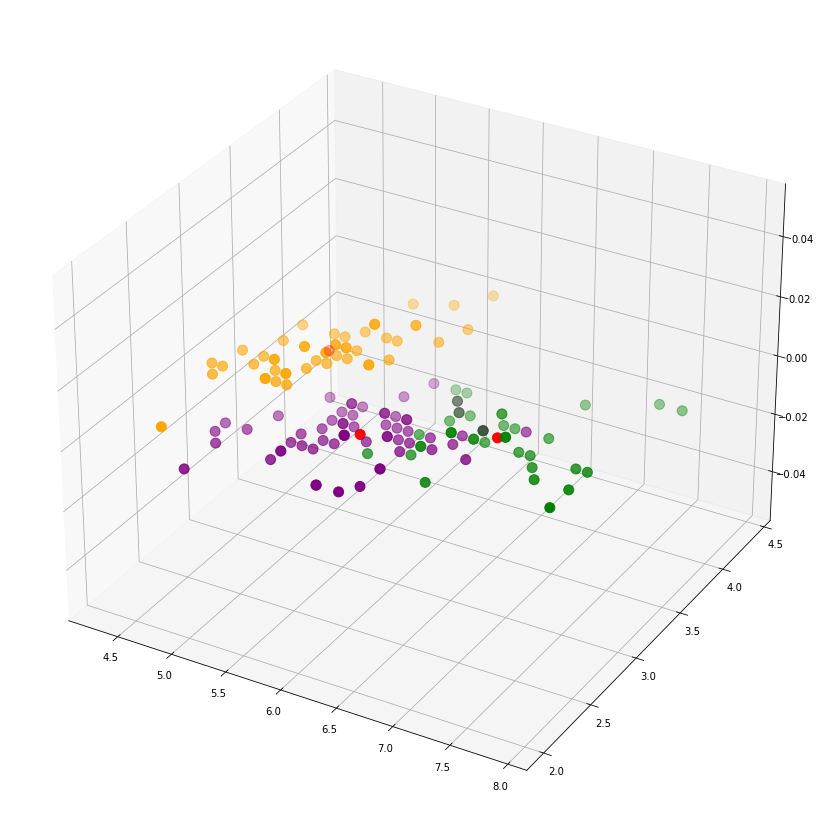

In [15]:
#3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'red', label = 'Centroids')

plt.show()



## 5. Labelling the predictions 

In [16]:
# considering 0 corresponds to 'Iris-setosa'
#1 to 'Iris-versicolour'
#2 to 'Iris-virginica'
y_kmeans = np.where(y_kmeans==0, 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans==1, 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans==2, 'Iris-virginica', y_kmeans)


## 6. Adding the prediction to the dataset 

In [20]:
data_with_clusters = iris_df.copy()
data_with_clusters["Clusters"] = y_kmeans
print(data_with_clusters.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

  Clusters  
0        1  
1        1  
2        1  
3        1  
4        1  
5        1  
6        1  
7        1  
8        1  


# DATA VISUALISATION 

## 7. Barplot-Cluster Distribution 

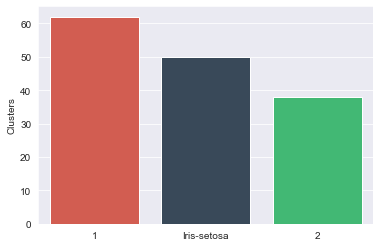

In [30]:
# Bar plot
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Clusters"] .unique(),
            y = data_with_clusters["Clusters"] .value_counts(),
            palette=sns.color_palette(["#e74c3c","#34495e","#2ecc71"]));


## Bar plot Inference 

There are 62 iris-versicolour,50 iris-setosa and 38 iris-virginica samples in the dataset.


## 8. Violin plot 

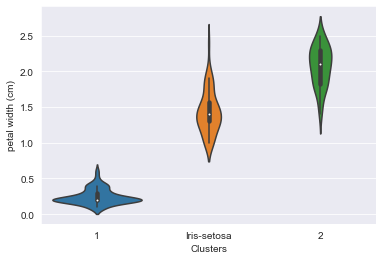

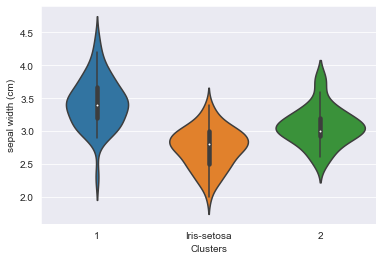

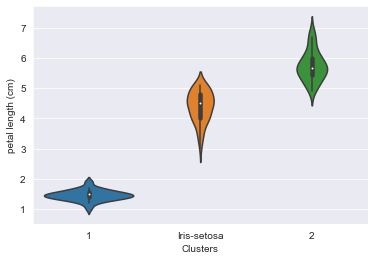

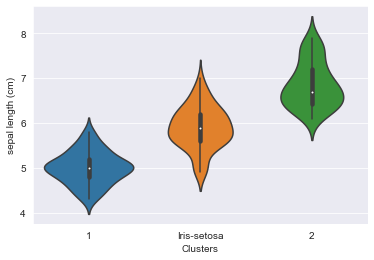

In [32]:
sns.violinplot(x="Clusters",y="petal width (cm)" , data=data_with_clusters)
plt.show()
sns.violinplot(x="Clusters",y="sepal width (cm)" , data=data_with_clusters)
plt.show()
sns.violinplot(x="Clusters",y="petal length (cm)" , data=data_with_clusters)
plt.show()
sns.violinplot(x="Clusters",y="sepal length (cm)" , data=data_with_clusters)
plt.show()


# THANK YOU!